In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

from __future__ import print_function
from __future__ import division 

from scipy.sparse.linalg import svds as sparse_svd

from sklearn.preprocessing import StandardScaler

import seaborn as sbn

import matplotlib.image as mpimg
from numpy import linalg as LA

Question 1:

(An open ended asignment) Visit the University of California open source data repository. Pick up an appropriate dataset of your choice preferably one with default-task 'classification'. Follow the examples provided during the class to get some insight from the data that you have selected. In the process of doing so utilize any tools and techniques at your disposal including (and not limited to)...

    Observation of covariance and correlation between different features (columns, explanatory variables).
    Distribution of different features and observations.
    Utilize PCA to describe low-dimension representations.
    Use plots such as Scree-plot, Bi-plot etc.
    Discuss and clustering behaviours around the classes exposed by the first few PCs.
    Anything else that you find interesting.

In [2]:
#Glass Identification Data Set
col_names = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
data = pd.read_csv('./data/glass.data', skiprows=1, names=col_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [3]:
data.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
bridge_corr = data.corr()
corr = bridge_corr.values

<AxesSubplot:>

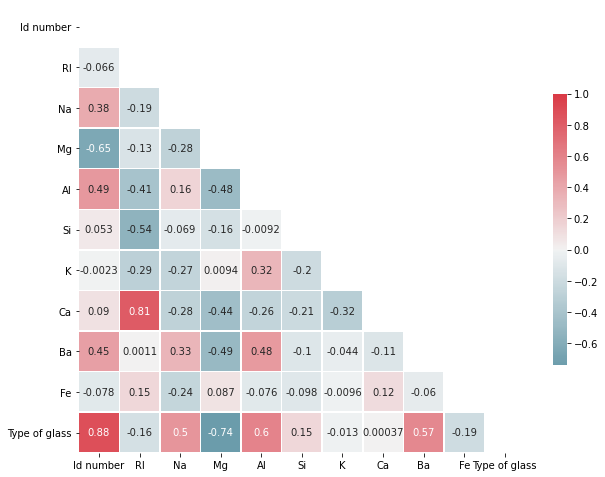

In [5]:
# Correlation between features

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sbn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sbn.heatmap(bridge_corr, mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
data_mat = data.values
X = data_mat[:,0:10]
Y = data_mat[:,10]

In [7]:
np.set_printoptions(precision=2, suppress=True)
sigmaX = np.std(X,axis=0)
# X = X/sigmaX # If Correlation PCA is required
muX = np.mean(X, axis=0)
n = X.shape[0]-1
print("The size of data set is:", n)
S = np.dot((X - muX).T, (X - muX)) / (n-1)
print('Covariance matrix: \n:')
print(S)

The size of data set is: 212
Covariance matrix: 
:
[[3816.5    -0.01   19.3   -57.72   15.12    2.52   -0.09    7.97   13.93
    -0.47]
 [  -0.01    0.     -0.     -0.     -0.     -0.     -0.      0.      0.
     0.  ]
 [  19.3    -0.      0.67   -0.33    0.06   -0.04   -0.14   -0.32    0.13
    -0.02]
 [ -57.72   -0.     -0.33    2.08   -0.35   -0.18    0.01   -0.92   -0.35
     0.01]
 [  15.12   -0.      0.06   -0.35    0.25   -0.      0.11   -0.19    0.12
    -0.  ]
 [   2.52   -0.     -0.04   -0.18   -0.      0.6    -0.1    -0.23   -0.04
    -0.01]
 [  -0.09   -0.     -0.14    0.01    0.11   -0.1     0.43   -0.3    -0.01
    -0.  ]
 [   7.97    0.     -0.32   -0.92   -0.19   -0.23   -0.3     2.04   -0.08
     0.02]
 [  13.93    0.      0.13   -0.35    0.12   -0.04   -0.01   -0.08    0.25
    -0.  ]
 [  -0.47    0.     -0.02    0.01   -0.     -0.01   -0.      0.02   -0.
     0.01]]


In [8]:
# Eigenvalue Decomposition of S
w, v = np.linalg.eig(S)

#print('Eigenvectors \n%s' %v)
print('\nEigenvalues \n%s' %w)
print('\n Explained Ratio: \n%s' %(w/np.sum(w)))


Eigenvalues 
[3817.6     2.6     1.02    0.67    0.64    0.21    0.1     0.01    0.
    0.  ]

 Explained Ratio: 
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
#SVD based approach
muX = np.mean(X, axis=0)
n = X.shape[0]-1
print("The size of data set is:", n)
U,s,V = np.linalg.svd(X-muX)
#print('Covariance matrix: \n:')
#print(S)
s2 = s**2;
print('\n Singularvalues \n%s' %s)
print('\n Singularvalues *(n-1) \n {}'.format(s**2/(n-1)))
print('\n Explained Ratio: \n%s' %(s2/np.sum(s2)))

The size of data set is: 212

 Singularvalues 
[897.5   23.42  14.65  11.85  11.61   6.65   4.61   1.38   0.56   0.01]

 Singularvalues *(n-1) 
 [3817.6     2.6     1.02    0.67    0.64    0.21    0.1     0.01    0.
    0.  ]

 Explained Ratio: 
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Question 2
Use the Python code for image compression to compress the national flags of different countries of your choice. The smallest rank r gives the numerical rank of the flag. Pick up any 5 national flags and arrange them in the order of decreasing numerical rank*.

    *: the numerical rank could be given by the number of singular values larger than _ × ‖A‖F where _ = 10^−16 is the machine epsilon

In [10]:
## Following code has been copied from Week 1 notebook
epsilon = 10e-16
rank_pix = np.array([[0, 0], [1, 0], [2, 0], [3, 0], [4, 0]])
pix_new = []

ima = './images/'
flag_names = ['uzbekistan', 'canada', 'new_zealand', 'spain', 'South_africa']
jpg = '.jpg'
for i in range(5):
    pix = mpimg.imread(ima + flag_names[i] + jpg) 
    
    ## SVD of the red, green and blue channels separately (pix1)
    pix_rgb = pix/255.0;
    U0,S0,V0 = np.linalg.svd(pix_rgb[:,:,0], full_matrices=True)
    U1,S1,V1 = np.linalg.svd(pix_rgb[:,:,1], full_matrices=True)
    U2,S2,V2 = np.linalg.svd(pix_rgb[:,:,2], full_matrices=True)

    AF_norm = LA.norm(pix)
    
    rank_pix[i][1] = (S0>AF_norm*epsilon).sum()

    ## Reconstruction of the image from fewer components from the SVD
    pix_compressed = np.zeros_like(pix_rgb);
    k=20
    pix_compressed[:,:,0] = np.dot(U0[:,:k], V0[:k,:]*S0[:k].reshape(k,1));
    pix_compressed[:,:,1] = np.dot(U1[:,:k], V1[:k,:]*S1[:k].reshape(k,1));
    pix_compressed[:,:,2] = np.dot(U2[:,:k], V2[:k,:]*S2[:k].reshape(k,1));
    
    pix_new.append(pix_compressed)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Compressed flags in order of decreasing rank:
Rank of matrix below: 327


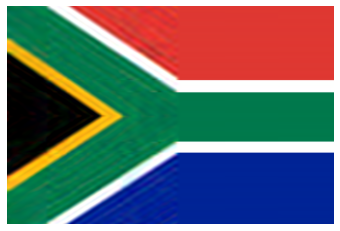

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rank of matrix below: 311


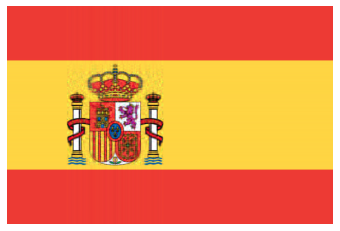

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rank of matrix below: 177


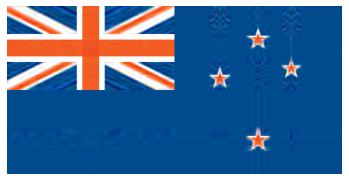

Rank of matrix below: 644


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


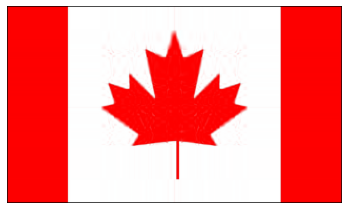

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Rank of matrix below: 235


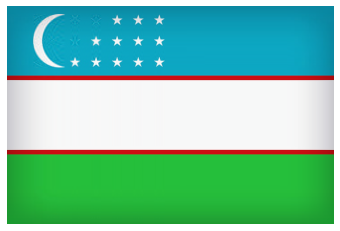

In [11]:
np.sort(rank_pix, axis=1)

print("Compressed flags in order of decreasing rank:")

for i in range(5):
    ## Display the reconstructed images
    print("Rank of matrix below:", rank_pix[4-i][1])
    plt.axis('off')
    plt.imshow(pix_new[rank_pix[4-i][0]])
    plt.show()


Question 3

Use your understanding of singular value decomposition, matrix completion and recommendation systems (from your last
reading, R2) to build a basic movie recommendation system.

    Evaluate your system on the test data (20%) and present the statistics (precision, recall and F1-score).
    Use the following data set https://grouplens.org/datasets/movielens/100k/

In [12]:
#users
col_user = ['user id','Age','Gender','Occupation','Zip code']
users = pd.read_csv('./data/u.user', names=col_user, sep='|', engine='python')
#users.info()

In [13]:
#ratings
col_rate = ['user id', 'movie id', 'rating', 'timestamp' ]
ratings = pd.read_csv('./data/u.data', '\t', names=col_rate, engine='python')
#ratings.info()

In [14]:
#movies
col_movies = ['movie id', 'movie title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 
               'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./data/u.item', names=col_movies, sep='|', encoding = 'latin-1', engine='python')
#movies.info()

In [15]:
#missing value check
users.isna().apply(pd.value_counts) 
ratings.isna().apply(pd.value_counts)
movies.isna().apply(pd.value_counts)
# Dropping irrelevant columns
movies.drop(columns= ['video release date', 'IMDb URL'], inplace=True)

In [16]:
#merging ratings and movies
ratings = ratings.merge(movies,on='movie id', how='left')
#ratings.head(10)

In [17]:
#average rating
Average_ratings = pd.DataFrame(ratings.groupby('movie title')['rating'].mean())
#Average_ratings.head(10)

In [18]:
Average_ratings['Total Ratings'] = pd.DataFrame(ratings.groupby('movie title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
movie title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [19]:
#Calculating The Correlation
movie_user = ratings.pivot_table(index='user id',columns='movie title',values='rating')
#movie_user.head(10)

In [23]:
#chose movie to test recommender system
correlations = movie_user.corrwith(movie_user['101 Dalmatians (1996)'])
correlations.head()

C:\Users\Malov Family\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Malov Family\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie title
'Til There Was You (1997)   -1.000000
1-900 (1994)                      NaN
101 Dalmatians (1996)        1.000000
12 Angry Men (1957)         -0.049890
187 (1997)                   0.269191
dtype: float64

In [21]:
#remove empty vales and merge the total ratings with the correlation 
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head()

,Correlation,Total Ratings
movie title,,
'Til There Was You (1997),-1.000000,9
101 Dalmatians (1996),1.000000,109
12 Angry Men (1957),-0.049890,125
187 (1997),0.269191,41
2 Days in the Valley (1996),0.048973,93


In [22]:
#now filter for rating atleast 100 and display top 10 recommendations 
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()
recc = recc.merge(movies,on='movie title', how='left')
recc.head(10)

,movie title,Correlation,Total Ratings,movie id,release date,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,101 Dalmatians (1996),1.000000,109,225,27-Nov-1996,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Murder at 1600 (1997),0.663965,218,322,18-Apr-1997,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,Miracle on 34th Street (1994),0.609938,101,378,01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Being There (1979),0.530438,116,663,01-Jan-1979,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Remains of the Day, The (1993)",0.514223,150,86,01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Gone with the Wind (1939),0.512581,171,133,01-Jan-1939,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,"Piano, The (1993)",0.498792,168,582,01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,Under Siege (1992),0.496127,124,233,01-Jan-1992,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Top Gun (1986),0.492492,220,161,01-Jan-1986,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,Arsenic and Old Lace (1944),0.486547,115,659,01-Jan-1944,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
